<a href="https://colab.research.google.com/github/tazar09/napoleon/blob/main/us_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
pd.set_option('display.max_rows', 100)
pd.options.display.max_rows = 100
import re

In [5]:
# pip install autoscraper
# from autoscraper import AutoScraper

#Scrape for the list of states of US.

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
df = pd.read_html(url)[1]

In [7]:
df = df.droplevel(axis = 1, level = 0)
df.columns = ['state',
       'abrev', 'capital', 'largest',
       'admission', 'population', 'total_mi2',
       'total_km2', 'land_mi2', 'land_km2', 'water_mi2', 'water_km2', 'representitives']
df['admission'] = pd.to_datetime(df['admission'])

In [8]:
df.head()

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,52420,135767,50645,131171,1775,4597,7
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,665384,1723337,570641,1477953,94743,245384,1
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,113990,295234,113594,294207,396,1026,9
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,53179,137732,52035,134771,1143,2961,4
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,163695,423967,155779,403466,7916,20501,52


#Columns with admission dates.

In [9]:
df['date_rank'] = df['admission'].rank(ascending = True).astype(int)
df['state_time_days'] = (dt.now() - df['admission']).dt.days
df['state_time_years'] = df['state_time_days']/365
df['state_time_years'] = df['state_time_years'].round(2)
df['density_land'] = (df['population'] / df['land_km2']).round(2)

In [13]:
df.sort_values(by = 'density_land', ascending = False).head()

,state,abrev,capital,largest,admission,population,total_mi2,total_km2,land_mi2,land_km2,water_mi2,water_km2,representitives,date_rank,state_time_days,state_time_years,density_land
29,New Jersey,NJ,Trenton,Newark,1787-12-18,9288994,8723,22591,7354,19047,1368,3544,12,3,86178,236.10,487.69
38,Rhode Island,RI,Providence,Providence,1790-05-29,1097379,1545,4001,1034,2678,511,1324,2,13,85285,233.66,409.78
20,Massachusetts[B],MA,Boston,Boston,1788-02-06,7029917,10554,27336,7800,20202,2754,7134,9,6,86128,235.97,347.98
6,Connecticut,CT,Hartford,Bridgeport,1788-01-09,3605944,5543,14357,4842,12542,701,1816,5,5,86156,236.04,287.51
19,Maryland,MD,Annapolis,Baltimore,1788-04-28,6177224,12406,32131,9707,25142,2699,6990,8,7,86046,235.74,245.69


<Axes: title={'center': 'Most dense states'}, ylabel='state'>

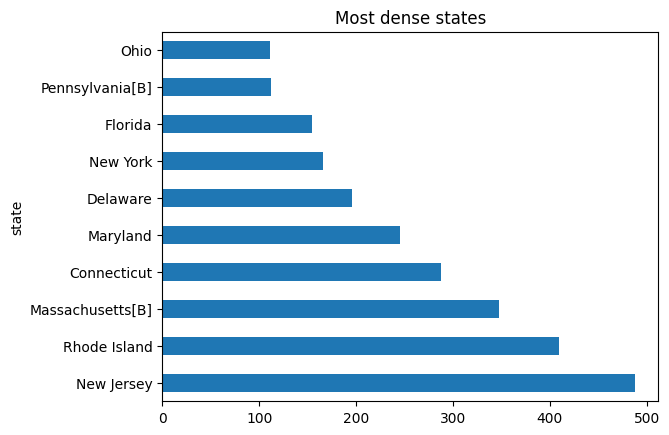

In [11]:
df.sort_values('density_land', ascending = False).head(10).plot(kind = 'barh', x = 'state', y = 'density_land', title = 'Most dense states', legend = False)

#Column with the population density variable.

This should account for land/water segmentation. How much area is covered with water

In [16]:
df['land_water'] = ((df['water_km2']/df['land_km2'])*100).round(1)

Drop duplicate area with miles standard.

In [19]:
df = df.drop(['water_mi2', 'land_mi2', 'total_mi2'], axis = 1)

Rename columns that is too long.

In [22]:
df.columns = ['state', 'abrev', 'capital', 'largest', 'admission', 'population',
       'total_km2', 'land_km2', 'water_km2', 'reps', 'date_rank',
       'state_time_days', 'state_time_years', 'density_land', 'land_water']

In [24]:
df.head()

,state,abrev,capital,largest,admission,population,total_km2,land_km2,water_km2,reps,date_rank,state_time_days,state_time_years,density_land,land_water
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,135767,131171,4597,7,22,74495,204.10,38.30,3.5
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,1723337,1477953,245384,1,49,23706,64.95,0.50,16.6
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,295234,294207,1026,9,48,40831,111.87,24.31,0.3
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,137732,134771,2961,4,25,68467,187.58,22.35,2.2
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,423967,403466,20501,52,31,63268,173.34,98.00,5.1


In [30]:
df.sort_values(by = 'land_water', ascending = False).head()

,state,abrev,capital,largest,admission,population,total_km2,land_km2,water_km2,reps,date_rank,state_time_days,state_time_years,density_land,land_water
21,Michigan,MI,Lansing,Detroit,1837-01-26,10077331,250487,146435,104052,13,26,68242,186.96,68.82,71.1
10,Hawaii,HI,Honolulu,Honolulu,1959-08-21,1455271,28313,16635,11678,2,50,23476,64.32,87.48,70.2
38,Rhode Island,RI,Providence,Providence,1790-05-29,1097379,4001,2678,1324,2,13,85285,233.66,409.78,49.4
20,Massachusetts,MA,Boston,Boston,1788-02-06,7029917,27336,20202,7134,9,6,86128,235.97,347.98,35.3
19,Maryland,MD,Annapolis,Baltimore,1788-04-28,6177224,32131,25142,6990,8,7,86046,235.74,245.69,27.8


Clean the 'state' column from endnotes markers.

In [28]:
pattern = r"\[.*?\]"
df['state'] = df['state'].apply(lambda x: re.sub(pattern, "", x))

In [29]:
df.head()

,state,abrev,capital,largest,admission,population,total_km2,land_km2,water_km2,reps,date_rank,state_time_days,state_time_years,density_land,land_water
0,Alabama,AL,Montgomery,Huntsville,1819-12-14,5024279,135767,131171,4597,7,22,74495,204.10,38.30,3.5
1,Alaska,AK,Juneau,Anchorage,1959-01-03,733391,1723337,1477953,245384,1,49,23706,64.95,0.50,16.6
2,Arizona,AZ,Phoenix,Phoenix,1912-02-14,7151502,295234,294207,1026,9,48,40831,111.87,24.31,0.3
3,Arkansas,AR,Little Rock,Little Rock,1836-06-15,3011524,137732,134771,2961,4,25,68467,187.58,22.35,2.2
4,California,CA,Sacramento,Los Angeles,1850-09-09,39538223,423967,403466,20501,52,31,63268,173.34,98.00,5.1
